In [1]:
import pandas as pd
import numpy as np

from numpy.linalg import norm
from sklearn.decomposition import PCA

import itertools
import random

import pickle

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
domain = 'fashion'
datapath = '../data-seed/{}/'.format(domain)
path = 'random-test/test-network-features/'
header = ['{}'.format(i) for i in range(1,9)]

In [3]:
test = 1

seed_data = pd.read_csv(datapath+'/user.csv', sep='\t')
seed_data['usertype'] = 'seed'

# test ids needed to filter the mentioned/following/followed users (they are not included in the ranking)
testusers = pd.read_csv('../data-random/user.csv', sep='\t')

In [10]:
def plotData(seeds, candidates, name, centroids = None):
    x = 'pca1'
    y = 'pca2'
    
    plt.figure(figsize=(12,12))
    plt.scatter(candidates[x], candidates[y], marker='.', s=65, lw=0, alpha=0.7, label='candidates')
    plt.scatter(seeds[x], seeds[y], marker='x', color='red', label='seeds')
    
    if centroids is not None:
        for c in centroids:
            plt.scatter(c[0], c[1], marker='o', color='black', label='centroid')
    
    plt.title('PCA of {} embeddings'.format(name), fontsize=16)
    plt.ylabel('PCA Component 2', fontsize=14)
    plt.xlabel('PCA Component 1', fontsize=14)
    plt.tick_params(labelsize=13)
    plt.legend(fontsize='large')

In [5]:
pca = PCA(n_components=2, random_state=11)

#### Use PCA to show the features using two components

1. Mentions

In [6]:
# features file reading and metadata inclusion
userdata = pd.read_csv(path+'m_network_{}_nodes.csv'.format(test), sep='\t') # match graph id and user instance
userdata = userdata[userdata['id_node'].isin(['seed', 'user'])]

data = pd.read_csv(path+'m_network_{}.emb'.format(test), sep=' ', header=None, skiprows=1)
data = userdata.merge(data, left_on='id', right_on=0)

data.drop(0, inplace=True, axis=1)
data.columns = ['id_graph','username','id_user','usertype']+header
data['id_user'] = data['id_user'].astype(int)

# keeps only seeds and test users for the evaluation
t1_users = testusers[testusers['n_test'] == test][['id_user', 'screen_name']].drop_duplicates()
t1_users['usertype'] = 'user'
data = data.merge(pd.concat([seed_data[['id_user', 'screen_name', 'usertype']], t1_users]), on='id_user')

In [7]:
data.head()

,id_graph,username,id_user,usertype_x,1,2,3,4,5,6,7,8,screen_name,usertype_y
0,1,edwardcordobab,47807745,seed,0.623386,1.14071,-5.09694,-12.01750,0.723569,0.250424,-2.99241,0.283470,edwardcordobab,seed
1,162,cortomoltedo,225029801,seed,1.214940,1.23608,-5.84149,-12.98040,0.599439,-0.119199,-3.45290,0.101869,cortomoltedo,seed
2,317,aincontri,525277114,seed,0.682810,0.95289,-3.60298,-9.06031,0.388262,0.109239,-2.02639,0.229818,aincontri,seed
3,339,angelosfrentzos,459326572,seed,1.110460,1.33048,-6.14891,-13.49380,0.305338,0.073072,-3.44082,0.368040,angelosfrentzos,seed
4,443,andrea_pompilio,536190247,seed,0.855306,1.30184,-5.49370,-12.85770,0.832781,-0.121664,-2.99364,0.578858,andrea_pompilio,seed


In [8]:
X = pca.fit_transform(data[header])
vizdata = data.merge(pd.DataFrame(X, columns=['pca1', 'pca2']), left_index=True, right_index=True)

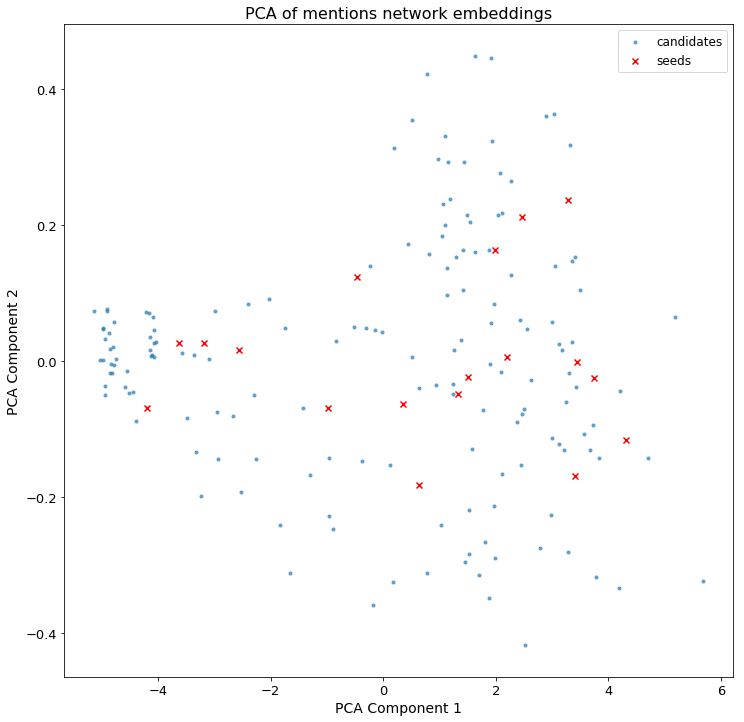

In [11]:
plotData(vizdata[vizdata['usertype_x'] == 'seed'],
        vizdata[vizdata['usertype_x'] == 'user'],
        'mentions network')

2. Following

In [12]:
# features file reading and metadata inclusion
userdata = pd.read_csv(path+'social_network_{}_following_nodes.csv'.format(test), sep='\t')
data = pd.read_csv(path+'social_network_{}_following.emb'.format(test), sep=' ', header=None, skiprows=1)
data = userdata.merge(data, left_on='id', right_on=0)
data.drop(0, inplace=True, axis=1)

# need to add usernames, too and filter the mentioned users that should not be included
t1_users = testusers[testusers['n_test'] == test][['id_user', 'screen_name']].drop_duplicates()
t1_users['usertype'] = 'user'
data = data.merge(pd.concat([seed_data[['id_user', 'screen_name', 'usertype']], t1_users]), on='id_user')

data.columns = ['id_graph','followers','following','id_user']+header+['username', 'usertype']

In [13]:
X = pca.fit_transform(data[header])
vizdata = data.merge(pd.DataFrame(X, columns=['pca1', 'pca2']), left_index=True, right_index=True)

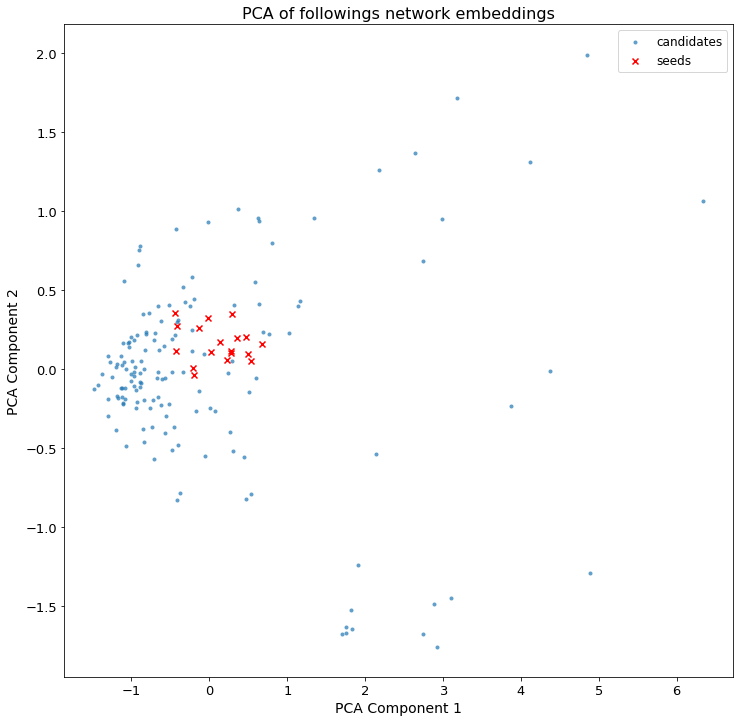

In [14]:
plotData(vizdata[vizdata['usertype'] == 'seed'],
        vizdata[vizdata['usertype'] == 'user'],
        'followings network')

3. Followers

In [30]:
# features file reading and metadata inclusion
userdata = pd.read_csv(path+'social_network_{}_follower_nodes.csv'.format(test), sep='\t')
data = pd.read_csv(path+'social_network_{}_follower.emb'.format(test), sep=' ', header=None, skiprows=1)
data = userdata.merge(data, left_on='id', right_on=0)
data.drop(0, inplace=True, axis=1)

# need to add usernames, too and filter the mentioned users that should not be included
t1_users = testusers[testusers['n_test'] == test][['id_user', 'screen_name']].drop_duplicates()
t1_users['usertype'] = 'user'
data = data.merge(pd.concat([seed_data[['id_user', 'screen_name', 'usertype']], t1_users]), on='id_user')

data.columns = ['id_graph','followers','following','id_user']+header+['username', 'usertype']

In [31]:
X = pca.fit_transform(data[header])
vizdata = data.merge(pd.DataFrame(X, columns=['pca1', 'pca2']), left_index=True, right_index=True)

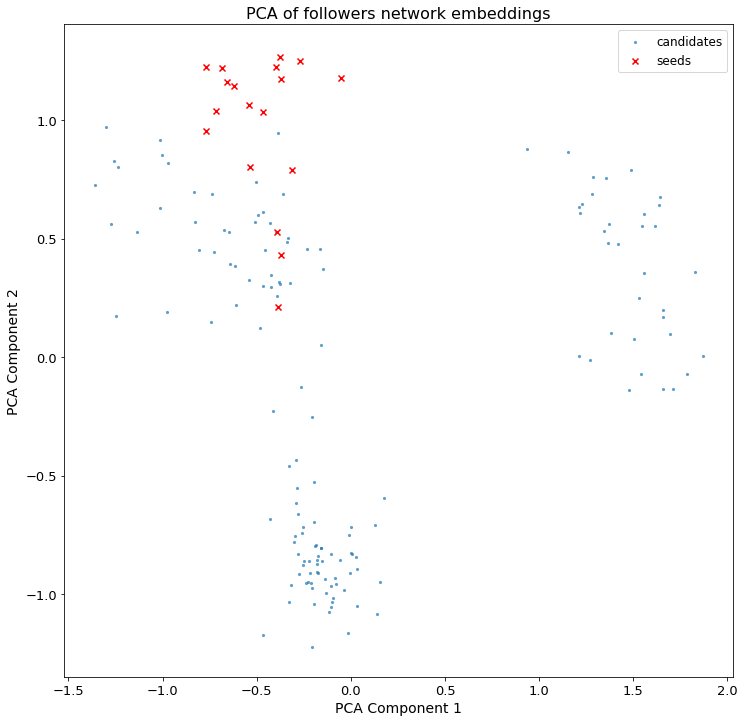

In [32]:
plotData(vizdata[vizdata['usertype'] == 'seed'],
        vizdata[vizdata['usertype'] == 'user'],
        'followers network')